<a href="https://colab.research.google.com/github/NicoEssi/TensorFlow_Exercises/blob/master/Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
print(keras.__version__)

     |████████████████████████████████| 86.3MB 250kB/s 
     |████████████████████████████████| 3.8MB 34.5MB/s 
     |████████████████████████████████| 450kB 38.4MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3
2.0.0
2.2.4-tf


# Image Classification of Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

#model.layers[1].get_weights()

In [0]:
model0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model.h5",
                                               save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)

In [0]:
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb])

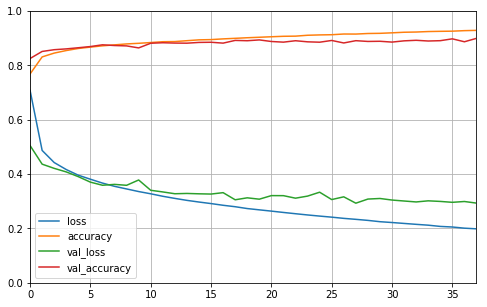

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
model.evaluate(X_test, y_test)

In [0]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [0]:
y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]

# Regression Multi-Layer Perceptron with Californian Housind Data

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])


model.compile(loss = "mean_squared_error",
             optimizer = "sgd")


history = model.fit(X_train, y_train, epochs = 20,
                   validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Fine-Tuning Hyperparameters
### First we need to create a function that will build and compile our Keras model, given a set of hyperparameters, mimicing regular scikit-learn regressors.

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [0]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [0]:
# Access best parameters
rnd_search_cv.best_params_

# Access best score
rnd_search_cv.best_score_

# Access best model
rnd_search_cv.best_estimator_.model

# Libraries for Hyperparameter Optimization

## Hyperopt
Optimizing over complex search spaces

https://github.com/hyperopt/hyperopt

## Hyperas, Talos, Kopt

Optimizing Keras hyperparameters

https://github.com/maxpumperla/hyperas

https://github.com/Avsecz/kopt

https://github.com/autonomio/talos

## Keras Tuner
Easy-to-use hyperparameter optimization library by Google with hosted service for visualization and analysis.

https://www.youtube.com/watch?v=Un0JDL3i5Hg

## Scikit-Optimize
General-purpose optimization library with its BayesSearchCV performing Bayesian optimization.

https://scikit-optimize.github.io/

## Spearmint
Bayesian optimization library

https://github.com/JasperSnoek/spearmint

## Hyperband
Fast hyperparameter tuning library based on a recent paper by Lisha Li et al.

https://arxiv.org/abs/1603.06560

https://github.com/zygmuntz/hyperband

## Sklearn-Deap
Hyperparameter optimization based on evolutionary algorithms

https://github.com/rsteca/sklearn-deap
